In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## EDM TRACKS

In [67]:
tracks_df1 = pd.read_csv('data/playlists/EDM_playlist_tracks_data.csv')
tracks_df1['EDM']='is EDM'
tracks_df1

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,EDM
0,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,7M842DMhYVALrXsw3ty7B3,175238,2022-08-26,96,0.561,0.965,...,0,0.0343,0.003830,0.000007,0.3710,0.3040,128.040,3VXReCeetN58c1clj9u8ZK,Tomorrowland 2022 Playlist 💙 EDM HITS,is EDM
1,2prnn41CblB8B4yWACDljP,Love Tonight - David Guetta Remix Edit,2TcGJdSOiOvITBzhvfX8XB,Shouse,2HYufzr6XUqSurRZdY0D9w,158095,2021-06-11,81,0.621,0.989,...,0,0.0434,0.015000,0.357000,0.1840,0.0348,126.002,3VXReCeetN58c1clj9u8ZK,Tomorrowland 2022 Playlist 💙 EDM HITS,is EDM
2,6GomT970rCOkKAyyrwJeZi,Move Your Body,37czgDRfGMvgRiUKHvnnhj,Öwnboss,4l9wMVL4XAM5jPMXP5RAbL,157444,2021-10-29,83,0.848,0.821,...,0,0.0527,0.016900,0.000403,0.0962,0.2490,125.051,3VXReCeetN58c1clj9u8ZK,Tomorrowland 2022 Playlist 💙 EDM HITS,is EDM
3,6ho0GyrWZN3mhi9zVRW7xi,Losing It,1VJ0briNOlXRtJUAzoUJdt,FISHER,143cxYCazoiNfviHRmxkdv,248035,2018-07-13,76,0.760,0.964,...,1,0.0577,0.001810,0.703000,0.0975,0.6430,125.003,3VXReCeetN58c1clj9u8ZK,Tomorrowland 2022 Playlist 💙 EDM HITS,is EDM
4,20on25jryn53hWghthWWW3,Do It To It,4pnp4w9g30yLfVIAFnZMRd,ACRAZE,58cd90Jkrovggh556JPN9L,157890,2021-08-20,85,0.854,0.806,...,0,0.0886,0.020900,0.054200,0.0703,0.6370,124.927,3VXReCeetN58c1clj9u8ZK,Tomorrowland 2022 Playlist 💙 EDM HITS,is EDM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,5ccvTpPXBpZP38QBtiPTnL,Aggro,5Ls22LIkcmlvTLHPdKV15E,Colo,2TneUJL54gUAkENdvIs4fe,178181,2022-09-23,7,0.593,0.532,...,0,0.0315,0.001070,0.000000,0.2410,0.0588,132.021,0iEb4H2gN8M8UH8zw9bp9r,EDMS 2022,is EDM
3472,7jI6vHD0BhqgsOj1d8Beh0,Dont Stop,5Ls22LIkcmlvTLHPdKV15E,Colo,2TneUJL54gUAkENdvIs4fe,181818,2022-09-23,8,0.667,0.535,...,1,0.0541,0.000887,0.121000,0.4790,0.1270,131.892,0iEb4H2gN8M8UH8zw9bp9r,EDMS 2022,is EDM
3473,2DvfGIBgsYVmcOW608SVuw,Moonlight,5Ls22LIkcmlvTLHPdKV15E,Colo,2TneUJL54gUAkENdvIs4fe,181818,2022-09-23,7,0.768,0.669,...,1,0.0650,0.001410,0.750000,0.0985,0.1120,131.978,0iEb4H2gN8M8UH8zw9bp9r,EDMS 2022,is EDM
3474,5ZgbJmeSONMvuy0AlSiJTU,Chilling,5Ls22LIkcmlvTLHPdKV15E,Colo,2TneUJL54gUAkENdvIs4fe,181818,2022-09-23,7,0.729,0.849,...,0,0.1050,0.000005,0.541000,0.1180,0.0603,132.061,0iEb4H2gN8M8UH8zw9bp9r,EDMS 2022,is EDM


In [58]:
features = ["danceability", "energy", "valence", "mode", "speechiness", "acousticness", "instrumentalness", "tempo", "loudness"]

columns_to_view = ['artist_name', 'track_name', 'EDM'] + features

In [74]:
df_features1 = tracks_df1[columns_to_view].copy()

# df_features['is_gg'] = ['kpop girl group' if artist in kpop_girl_grps else 'all else'
#                        for artist in df_features['artist_name'].values]

# get max value for normalization
max_tempo = df_features1['tempo'].max()
max_loudness = df_features1['loudness'].min()

# normalize tempo and loudness
df_features1['tempo']= df_features1['tempo']/max_tempo
df_features1['loudness']= df_features1['loudness']/max_loudness

# set multiindex
df_features1 = df_features1.set_index(['track_name', 'artist_name', 'EDM'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked1 = pd.DataFrame({'value': df_features1.stack()})
# # reset index
df_features_stacked1 = df_features_stacked1.reset_index()
# # rename level_3
df_features_stacked1 = df_features_stacked1.rename(columns={'level_3': 'feature'})
df_features_stacked1.head()

,track_name,artist_name,EDM,feature,value
0,I'm Good (Blue),David Guetta,is EDM,danceability,0.5610
1,I'm Good (Blue),David Guetta,is EDM,energy,0.9650
2,I'm Good (Blue),David Guetta,is EDM,valence,0.3040
3,I'm Good (Blue),David Guetta,is EDM,mode,0.0000
4,I'm Good (Blue),David Guetta,is EDM,speechiness,0.0343


## CLASSICAL TRACKS

In [69]:
tracks_df2 = pd.read_csv('data/playlists/classical_playlist_tracks_data.csv')
tracks_df2['EDM']='is Classical'
tracks_df2.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,EDM
0,61dYvvfIRtIDFuqZypPAta,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,2OpnKgmVYPEN2GldgBponI,151480,1983,64,0.2570,0.1090,...,1,0.0597,0.900,0.867,0.0762,0.3070,75.020,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,is Classical
1,4SFBV7SRNG2e2kyL1F6kjU,"The Well-Tempered Clavier: Book 1, BWV 846-869...",5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,1XORY4rQNhqkZxTze6Px90,139306,2019-03-29,63,0.2210,0.1260,...,1,0.0447,0.989,0.897,0.1020,0.2160,133.630,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,is Classical
2,3zLTPuucd3e6TxZnu2dlVS,"Bagatelle No. 25 in A Minor, WoO 59 ""Für Elise""",2wOqMjp9TyABvtHdOSOTUS,Ludwig van Beethoven,230jpjk9w7MGupNMMvXoaN,212066,2015,63,0.2890,0.0306,...,0,0.0446,0.987,0.911,0.1020,0.1180,125.610,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,is Classical
3,0DqFXzLtKkj9JO421NJpl1,"Suite No. 3 in D Major, BWV 1068: II. Air",5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,0RsNQJd8Em0kBK5BDTdAkb,363253,2020-08-31,61,0.0769,0.0846,...,1,0.0450,0.922,0.929,0.1130,0.0586,176.329,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,is Classical
4,1Mse9NKBbEASi50CQ4aYhr,Pachelbel: Canon and Gigue for Three Violins a...,62TD7509VQIxUe4WpwO0s3,Johann Pachelbel,5YCuibCDJrkVcS3UOAYqr9,301586,1986,57,0.1280,0.1320,...,1,0.0353,0.744,0.942,0.1070,0.0988,85.314,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,is Classical


In [75]:
df_features2 = tracks_df2[columns_to_view].copy()

# df_features['is_gg'] = ['kpop girl group' if artist in kpop_girl_grps else 'all else'
#                        for artist in df_features['artist_name'].values]

# get max value for normalization
max_tempo = df_features2['tempo'].max()
max_loudness = df_features2['loudness'].min()

# normalize tempo and loudness
df_features2['tempo']= df_features2['tempo']/max_tempo
df_features2['loudness']= df_features2['loudness']/max_loudness

# set multiindex
df_features2 = df_features2.set_index(['track_name', 'artist_name','EDM'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked2 = pd.DataFrame({'value': df_features2.stack()})
# # reset index
df_features_stacked2 = df_features_stacked2.reset_index()
# # rename level_3
df_features_stacked2 = df_features_stacked2.rename(columns={'level_3': 'feature'})
df_features_stacked2.head()

,track_name,artist_name,EDM,feature,value
0,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Johann Sebastian Bach,is Classical,danceability,0.2570
1,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Johann Sebastian Bach,is Classical,energy,0.1090
2,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Johann Sebastian Bach,is Classical,valence,0.3070
3,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Johann Sebastian Bach,is Classical,mode,1.0000
4,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Johann Sebastian Bach,is Classical,speechiness,0.0597


## Concatinated DF

In [76]:
final_df = pd.concat([df_features_stacked1, df_features_stacked2])
final_df

,track_name,artist_name,EDM,feature,value
0,I'm Good (Blue),David Guetta,is EDM,danceability,0.561000
1,I'm Good (Blue),David Guetta,is EDM,energy,0.965000
2,I'm Good (Blue),David Guetta,is EDM,valence,0.304000
3,I'm Good (Blue),David Guetta,is EDM,mode,0.000000
4,I'm Good (Blue),David Guetta,is EDM,speechiness,0.034300
...,...,...,...,...,...
15763,Noel nouvelet,Traditional,is Classical,speechiness,0.047200
15764,Noel nouvelet,Traditional,is Classical,acousticness,0.970000
15765,Noel nouvelet,Traditional,is Classical,instrumentalness,0.764000
15766,Noel nouvelet,Traditional,is Classical,tempo,0.655727


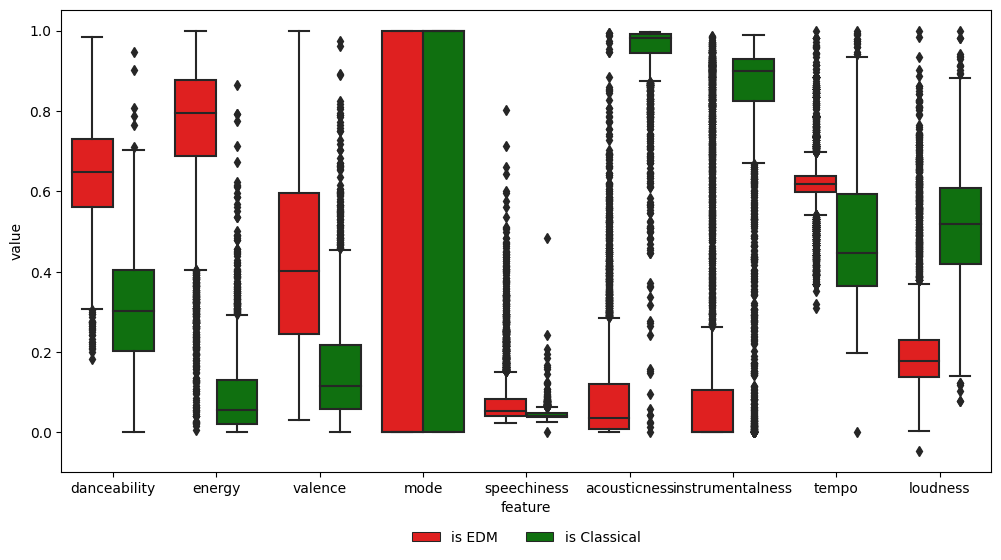

In [79]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)

sns.boxplot(data=final_df, x='feature', y='value',  hue='EDM', ax=ax,
            hue_order=['is EDM', 'is Classical'], palette=['red', 'green'])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)